# Tarefa Grupo : Previsão de custos de carros usados da Índia
Decisão e Aprendizagem Automática

[Link do Dataset](https://www.kaggle.com/datasets/sujay1844/used-car-prices)

Escolhemos este dataset pois somos fãs de desporto e Money ball e inventar texto

O objetivo deste dataset é prever o salário de jogadores da MLB tendo em conta as suas estatísticas. Queremos com isto confirmar se o salário dos jogadores é decidido através das suas estatiscias. 

É importante dizer que isto não leva em consideração a personalidades, a fama e outros fatores externos que podem levar ao aumento do salário.

Descrição dos atributos do [dataset](https://www.kaggle.com/datasets/thedevastator/uncovering-the-most-cost-effective-mlb-hitters-o)

| Nome da coluna | Descrição |
| -------- | -------- |
| Player Name | Nome do jogador. (String) |
| weight | Peso do jogador em libras. (Inteiro) | 
| height | Altura do jogador em polegadas. (Inteiro) |
| bats | Destro ou canhoto ao rebater. (String) |
| throws | Destro ou canhoto ao lançar. (String) |
| Season | Ano da temporada. (Inteiro) |
| League | Equipe da Liga Americana ou Nacional. (String) |
| Team | Nome da equipe da MLB. (String) |
| Franchise | Nome da franquia que possui a equipe. (String) |
| G | Número de jogos jogados pelo jogador durante a temporada. (Inteiro) |
| AB | Número de vezes ao bastão pelo jogador durante a temporada. (Inteiro) |
| R | Número de corridas marcadas pelo jogador durante a temporada. (Inteiro) |
| 2B | Número de duplas batidas pelo jogador durante a temporada. (Inteiro) |
| 3B | Número de triplas batidas pelo jogador durante a temporada. (Inteiro) |
| HR | Número de home runs batidos pelo jogador durante a temporada. (Inteiro) |
| RBI | Número de corridas batidas pelo jogador durante a temporada. (Inteiro) |
| SB | Número de bases roubadas pelo jogador durante a temporada. (Inteiro) |
| BB | Número de walks emitidos para o jogador durante a temporada. (Inteiro) |
| SO | Número de strikeouts pelo jogador durante a temporada. (Inteiro) |
| IBB | Base Intencional por Bolas ou Walk Intencional Emitido ao Redor do Árbitro de Home Plate. (Inteiro) |
| HBP | Batedor Atropelado na Vez ao Bastão. (Inteiro) |
| SH | Fly de sacrifício capturado e registrado durante o respectivo jogo de bola. (Inteiro) |
| SF | Número total de Flies de Sacrifício feitos até agora. (Inteiro) |
| PA | Número de Participações no Prato durante toda a duração do jogo. (Inteiro)


Nesta secção explicar as colunas que existem 
o objetivo do dataset
o porque de escolhermos este dataset
outras caracteristicas que achemos importantes

escolhemos dataset para um problema de regressao porque o outro e` classificacao

COMPLETAR ISTO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Em cada uma das seccoes escrever a conclusao ao final daquela iterecao

Explicar dataset, organizar notebook e explicar metedologia adotada (SEMMA)

### Importação das bibliotecas necessárias

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso




### Ingestão de dados

In [3]:
df = pd.read_csv("./carprices.csv",na_filter=False) # ver aquela cena do none as false 

### Visualização dos dados

In [4]:
df.head()

,#,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,,3.50


In [5]:
df.tail()

,#,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,,2.65
5846,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,,2.50


In [6]:
df.columns

Index(['#', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5847 non-null   object 
 9   Engine             5847 non-null   object 
 10  Power              5847 non-null   object 
 11  Seats              5847 non-null   object 
 12  New_Price          5847 non-null   object 
 13  Price              5847 non-null   float64
dtypes: float64(1), int64(3), object(10)
memory usage: 639.6+ KB


In [8]:

df.describe()

,#,Year,Kilometers_Driven,Price
count,5847.000000,5847.000000,5.847000e+03,5847.000000
mean,3013.181461,2013.448435,5.841013e+04,9.653742
std,1736.398890,3.194949,9.237971e+04,11.275966
min,1.000000,1998.000000,1.710000e+02,0.440000
25%,1509.500000,2012.000000,3.346750e+04,3.550000
50%,3015.000000,2014.000000,5.257600e+04,5.750000
75%,4517.500000,2016.000000,7.249050e+04,10.250000
max,6018.000000,2019.000000,6.500000e+06,160.000000


In [9]:
df.isnull().sum()

#                    0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

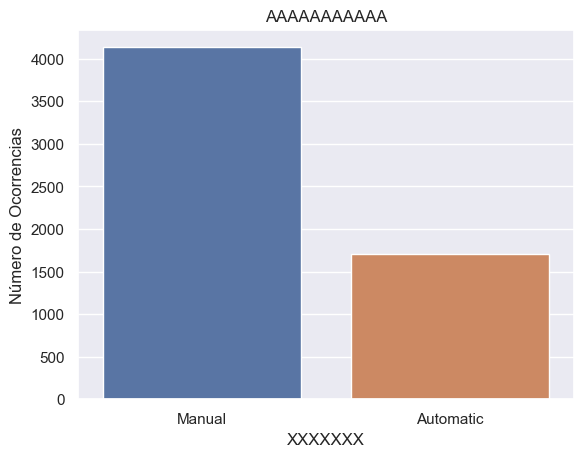

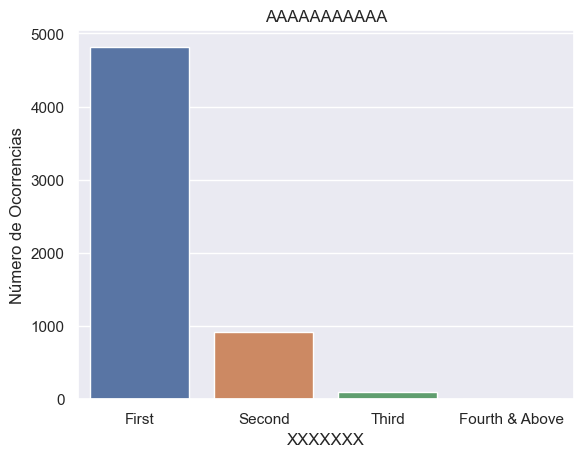

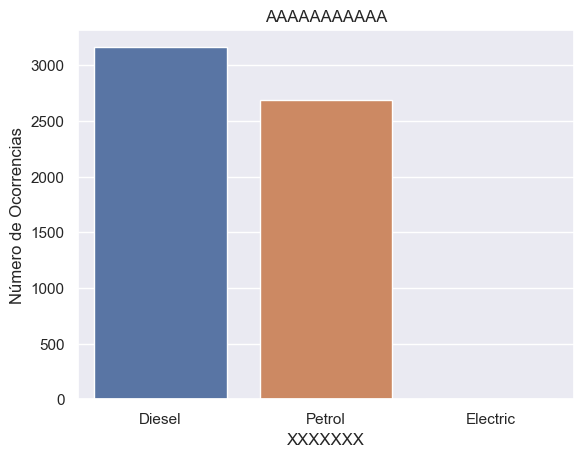

In [10]:
transmission_count = df['Transmission'].value_counts()
owner_count = df['Owner_Type'].value_counts()
fuel_count = df['Fuel_Type'].value_counts()

sns.set(style="darkgrid")
sns.barplot(x=transmission_count.index, y=transmission_count.values)
plt.title("AAAAAAAAAAA")
plt.ylabel("Número de Ocorrencias", fontsize=12)
plt.xlabel("XXXXXXX", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=owner_count.index, y=owner_count.values)
plt.title("AAAAAAAAAAA")
plt.ylabel("Número de Ocorrencias", fontsize=12)
plt.xlabel("XXXXXXX", fontsize=12)
plt.show()

sns.set(style="darkgrid")
sns.barplot(x=fuel_count.index, y=fuel_count.values)
plt.title("AAAAAAAAAAA")
plt.ylabel("Número de Ocorrencias", fontsize=12)
plt.xlabel("XXXXXXX", fontsize=12)
plt.show()

In [71]:
df1 = df.copy()

t_lables = df1['Transmission'].astype('category').cat.categories.tolist()
o_lables = df1['Owner_Type'].astype('category').cat.categories.tolist()
f_lables = df1['Fuel_Type'].astype('category').cat.categories.tolist()


#extract = df1['Mileage'].str.extractall(r'(\d+\.?\d*).+').values.tolist()

#print(extract)

replace = {'Transmission':{k: v for k,v in zip(t_lables,list(range(0,len(t_lables)+1)))},
           'Owner_Type':{'First' : 1, 'Second' : 2, 'Third' : 3, 'Fourth & Above' : 4},
           'Fuel_Type':{k: v for k,v in zip(f_lables,list(range(0,len(f_lables)+1)))}}

#print(replace)

#print(df1['Mileage'].values.tolist())

#l = {'Mileage':{k: v for k,v in zip(df1['Mileage'].values.tolist(),extract)}}

#print(l)

df1.replace(replace,inplace=True)
#df1.replace('kmpl|CC|bhp|Lakh|km/kg','',regex=True,inplace=True)
df1.head()
#df1.info()

,#,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,0,1,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,,12.50
1,2,Honda Jazz V,Chennai,2011,46000,2,1,1,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,0,1,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,0,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,0,1,1,23.08 kmpl,1461 CC,63.1 bhp,5.0,,3.50


In [22]:
df_int = df.select_dtypes(include=['int'])
df_int.corr()

,#,Year,Kilometers_Driven
#,1.000000,-0.001308,-0.008297
Year,-0.001308,1.000000,-0.169514
Kilometers_Driven,-0.008297,-0.169514,1.000000


<Axes: >

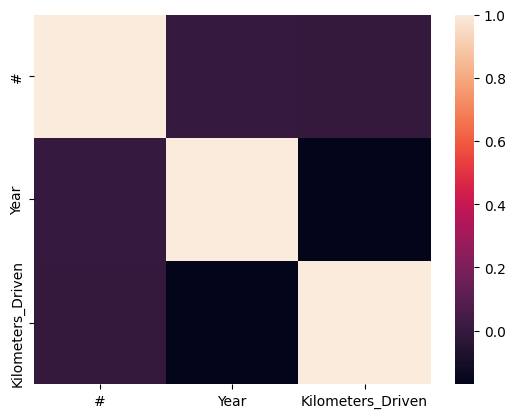

In [23]:
sns.heatmap(df_int.corr())

In [25]:
sns.heatmap(df_int.corrwith(df_int['Price']).to_frame(), annot=True)

KeyError: 'Price'

<Axes: xlabel='salary', ylabel='Count'>

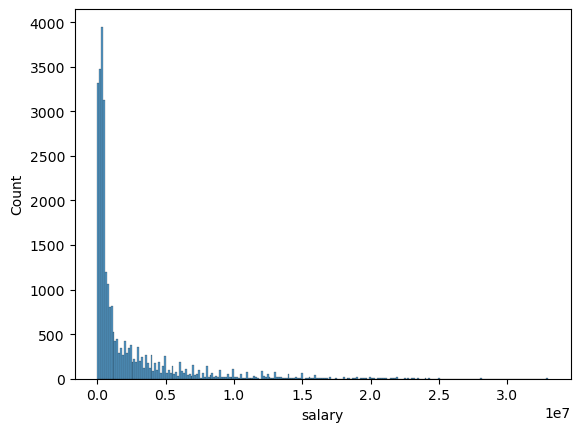

In [13]:
sns.histplot(df['salary'])

In [14]:
#sns.pairplot(df)

In [15]:
# verficiar duplicados
df.duplicated().sum()

0

In [16]:
df['salary'].value_counts(normalize=True) # com normalize é para ter percentagens

salary
109000     0.023822
200000     0.016506
500000     0.015446
1000000    0.014208
300000     0.012971
             ...   
2772500    0.000035
846667     0.000035
5792956    0.000035
4809159    0.000035
504100     0.000035
Name: proportion, Length: 3352, dtype: float64

In [17]:
df['salary'].describe()


count    2.829300e+04
mean     2.112965e+06
std      3.440239e+06
min      1.090000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.425000e+06
max      3.300000e+07
Name: salary, dtype: float64

### Tratamento de dados e Modelos

In [18]:
df['playerID']



0        aardsda01
1        aardsda01
2        aardsda01
3        aardsda01
4        aardsda01
           ...    
28288    zupcibo01
28289    zupcibo01
28290    zupcibo01
28291    zuvelpa01
28292     zychto01
Name: playerID, Length: 28293, dtype: object

##### Regressão Linear (sem Label Encoding)

In [32]:
# Nesta parte depois mudar vou fazer tratamento e iniciacao de um modelo

x = df_int.drop('salary',axis=1)

y = df['salary']

#print(y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# regressao linear
ln = LinearRegression()

ln.fit(x_train,y_train)

#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
#print(coeff_df)

print(ln.intercept_)

predictions = ln.predict(x_test)

#plt.scatter(y_test,predictions)
print()

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


print("\n---------CROSS-VALIDATION-----------\n")

# Define custom scorers

scoring = {
    'MAE': make_scorer(metrics.mean_absolute_error),
    'MSE': make_scorer(metrics.mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
}

# Perform cross-validation
scores = cross_validate(ln, x, y, cv=5, scoring=scoring, return_train_score=False)

# Print scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print('MAE:', scores['test_MAE'][i])
    print('MSE:', scores['test_MSE'][i])
    print('RMSE:', scores['test_RMSE'][i])
    print()

# Print average scores
print('Average MAE:', scores['test_MAE'].mean())
print('Average MSE:', scores['test_MSE'].mean())
print('Average RMSE:', scores['test_RMSE'].mean())


-306542481.7169748

MAE: 1921803.328078996
MSE: 8638694970687.966
RMSE: 2939165.69296254

---------CROSS-VALIDATION-----------

Fold 1:
MAE: 1864827.8311683363
MSE: 7720033829250.201
RMSE: 2778494.8855900746

Fold 2:
MAE: 1907884.4764286054
MSE: 8617466469511.542
RMSE: 2935552.1575185037

Fold 3:
MAE: 1947908.2114628595
MSE: 9251545474808.045
RMSE: 3041635.329030758

Fold 4:
MAE: 2033874.2248360072
MSE: 10060062549281.465
RMSE: 3171760.1657883064

Fold 5:
MAE: 2011344.0672006737
MSE: 9603017211061.682
RMSE: 3098873.539056036

Average MAE: 1953167.7622192963
Average MSE: 9050425106782.586
Average RMSE: 3005263.215396736


##### Regressão Linear (com Label Encoding)

In [33]:

# SEM CV !!!!

# Regressao linear com label encoding !!!!!!!!!11
le = LabelEncoder()


# Fit and transform the 'column_name' column
for col in ['bats','throws','teamID','League']:
    df[col] = le.fit_transform(df[col])


x = df.drop(['salary','playerID','Player Name','Franchise','Team'],axis=1)

#print(x.head)

y = df['salary']

#print(y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# regressao linear
ln = LinearRegression()

ln.fit(x_train,y_train)

#coeff_df = pd.DataFrame(ln.coef_,x.columns,columns=['Coefficient'])
#print(coeff_df)

print(ln.intercept_)

predictions = ln.predict(x_test)

#plt.scatter(y_test,predictions)
print()

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


print("\n---------CROSS-VALIDATION-----------\n")

# Define custom scorers

scoring = {
    'MAE': make_scorer(metrics.mean_absolute_error),
    'MSE': make_scorer(metrics.mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
}

# Perform cross-validation
scores = cross_validate(ln, x, y, cv=5, scoring=scoring, return_train_score=False)

# Print scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print('MAE:', scores['test_MAE'][i])
    print('MSE:', scores['test_MSE'][i])
    print('RMSE:', scores['test_RMSE'][i])
    print()

# Print average scores
print('Average MAE:', scores['test_MAE'].mean())
print('Average MSE:', scores['test_MSE'].mean())
print('Average RMSE:', scores['test_RMSE'].mean())


-307016505.92236423

MAE: 1920972.2204467459
MSE: 8636678876996.76
RMSE: 2938822.702545487

---------CROSS-VALIDATION-----------

Fold 1:
MAE: 1860253.6870158429
MSE: 7723041981006.961
RMSE: 2779036.1604352975

Fold 2:
MAE: 1907406.7677652575
MSE: 8609721066805.991
RMSE: 2934232.619750178

Fold 3:
MAE: 1948060.672266718
MSE: 9260010071799.076
RMSE: 3043026.465839408

Fold 4:
MAE: 2042638.9452019804
MSE: 10094512920672.73
RMSE: 3177186.321365609

Fold 5:
MAE: 2007084.7577894975
MSE: 9620260442886.42
RMSE: 3101654.4686483727

Average MAE: 1953088.9660078592
Average MSE: 9061509296634.238
Average RMSE: 3007027.2072077733


##### Support Vector Regression (SVR)
Com Cross-Validation

 

In [21]:


# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly' ], # , 'rbf', 'sigmoid'
    'C': [0.1, 1], # ,10,100
    'gamma': ['scale'], #'auto'
    'epsilon': [0.1, 0.3] # ,0.2,0.4,0.5
}

# Create a base model
svr = SVR()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
best_predictions = best_model.predict(x_test)

print(best_model)
best_params = best_model.get_params()
print('Gamma:', best_params['gamma'])
print('Epsilon:', best_params['epsilon'])

# Print metrics
print('MAE:', metrics.mean_absolute_error(y_test, best_predictions))
print('MSE:', metrics.mean_squared_error(y_test, best_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, best_predictions)))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[CV] END .......C=0.1, epsilon=0.3, gamma=scale, kernel=poly; total time=  56.2s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time= 1.0min
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time= 1.0min
[CV] END .......C=0.1, epsilon=0.3, gamma=scale, kernel=poly; total time= 1.0min
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time= 1.0min
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time= 1.0min
[CV] END .....C=0.1, epsilon=0.3, gamma=scale, kernel=linear; total time= 1.0min
[CV] END .....C=0.1, epsilon=0.3, gamma=scale, kernel=linear; total time= 1.0min
[CV] END .........C=1, epsilon=0.1, gamma=scale, kernel=poly; total time=  29.6s
[CV] END .........C=1, epsilon=0.1, gamma=scale, kernel=poly; total time=  30.7s
[CV] END .........C=1, epsilon=0.3, gamma=scale, kernel=poly; total time=  30.3s
[CV] END .........C=1, epsilon=0.3, gamma=scale, kernel=poly; total time=  30.6s
[CV] END .......C=1, epsilon

#### Decision Tree Regression

In [22]:
dtr = DecisionTreeRegressor(random_state=0)

# Train the model
dtr.fit(x_train, y_train)

# Make predictions
predictions = dtr.predict(x_test)

# Print metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1994474.9619462772
MSE: 13614193511878.926
RMSE: 3689741.6592329233


#### Random Forest Regression
Sem *cross-validation* e sem *label enconding*

In [23]:
# ADICIONAR DEPOIS HYPERPARAMETER TUNING !!!

# Create a Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
rfr.fit(x_train, y_train)

# Make predictions
predictions = rfr.predict(x_test)

# Print metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1556296.9173727615
MSE: 6447965636152.653
RMSE: 2539284.473262626


#### Neural Networks

In [44]:
#!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=10)

# Make predictions
predictions = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = tf.sqrt(mse)

# Print metrics
print('MAE:', mae.numpy())
print('MSE:', mse.numpy())
print('RMSE:', rmse.numpy())

Epoch 1/5
1981/1981 [==============================] - 11s 5ms/step - loss: 13258592354304.0000
Epoch 2/5
1981/1981 [==============================] - 8s 4ms/step - loss: 12136141029376.0000
Epoch 3/5
1981/1981 [==============================] - 8s 4ms/step - loss: 11721764765696.0000
Epoch 4/5
1981/1981 [==============================] - 8s 4ms/step - loss: 11481626181632.0000
Epoch 5/5
266/266 [==============================] - 1s 4ms/step


2023-11-06 21:31:31.104208: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 288184576 exceeds 10% of free system memory.
2023-11-06 21:31:31.555334: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 288184576 exceeds 10% of free system memory.


MAE: [2586321.5 2186473.5 2582562.2 ... 2126658.  2058898.  2749174. ]
MSE: [1.1938023e+13 1.1425095e+13 1.1928012e+13 ... 1.1476993e+13 1.1597181e+13
 1.2443467e+13]
RMSE: [3455144.5 3380102.8 3453695.5 ... 3387771.  3405463.5 3527530. ]


#### Lasso Regression (NÃO DEMOS)
Sem Cross Validation

In [43]:
# Define the model
model = Lasso(alpha=0.1)

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 1920972.1919651527
MSE: 8636678772860.488
RMSE: 2938822.6848281417


/home/simao/miniconda3/envs/daa310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.022e+16, tolerance: 2.380e+13
  model = cd_fast.enet_coordinate_descent(


## Conclusões

RandomForest foi o melhor até agora !

## NOTAS :  !!!!!!!!!!!!!!!!!!!11111

1. USAR OUTRAS TECNICAS E EXPLORAR E TRATAR ISTO MELHOR

2. UTILIZAR OUTRO DATASET E FAZER OUTRA CENA IGUAL COM OUTRO DATASET ! 


POR MAIS GRAFICOS PL3 !!!!!!!!!!!!!!!! => Ver slides

NOS DAS REGRESSÕES TENTAR FAZER COM CROSS OUT VALIDATION  (cv)!!!!!

Tentar fazer todos os algoritmos com cv e label encondign e eliminar colunas e cenas assim!!
Para tentar o melhor modelo